# Challenge Week 5 : Convolution Neural Network (CNN)

Nama      : Ashari Retno Andrianti

No. Regis : 152236035100-240

Tugas  : Binary images classification using CNN, untuk data fokus vs tidak fokus menyetir

In [1]:
# Install Packages

# General
import pandas as pd
import seaborn as sns
import os
from shutil import unpack_archive
pd.set_option("display.max_columns", 101)
import shutil
import sys
!{sys.executable} -m pip install wget
from keras.preprocessing.image import img_to_array, load_img
from sklearn.datasets import load_files
from sklearn.metrics import confusion_matrix, classification_report

# Modeling 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Visualization
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Connect colab and drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Change directory into drive
%cd "/content/drive/MyDrive/DTS 2022/Exercise_W5"

/content/drive/MyDrive/DTS 2022/Exercise_W5


In [4]:
# Checking base directory
!pwd

/content/drive/MyDrive/DTS 2022/Exercise_W5


# Data Preparation
Dataset = Fokus VS Tidak fokus menyetir

In [5]:
# Download and extract images data
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/8c7bc0c59ee6bcdb3646a1997606a9d0/test.zip'
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/ffe8804da24b94ee410a8730ba297dfc/train_0.zip'
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/5460fcc87e2d7f7e19c17f719e0df00a/train_1.zip'

print('Extracting Train Dataset : Label 1')
unpack_archive('train_1.zip', '')

print('Extracting Train Dataset : Label 0')
unpack_archive('train_0.zip', '')

print('Extracting Test Dataset')
unpack_archive('test.zip', '')

print('Dataset Extracted')


os.remove('train_1.zip')
os.remove('train_0.zip')
os.remove('test.zip')
print('Extra Files Removed')

--2022-06-23 12:19:38--  https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/8c7bc0c59ee6bcdb3646a1997606a9d0/test.zip
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 52.216.184.67
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|52.216.184.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58948996 (56M) [application/zip]
Saving to: ‘test.zip’

test.zip            100%[===================>]  56.22M  11.1MB/s    in 5.4s    

2022-06-23 12:19:44 (10.4 MB/s) - ‘test.zip’ saved [58948996/58948996]

--2022-06-23 12:19:45--  https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/ffe8804da24b94ee410a8730ba297dfc/train_0.zip
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 52.216.37.25
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|52.216.37.25|:443... connec

In [6]:
# Define working directory
base_dir = "/content/drive/MyDrive/DTS 2022/Exercise_W5"

# Define working directory for train, validation and test data
train_dir = os.path.join(base_dir, 'train_new')
val_dir = os.path.join(base_dir, 'validation')
test_dir = "/content/drive/MyDrive/DTS 2022/Exercise_W5/test"

# Define working directory for each labels
label_0_dir = os.path.join(base_dir+'/train', '0')
label_1_dir = os.path.join(base_dir+'/train', '1')

In [7]:
# Define working directory for training and validation data
train_0 = os.path.join(train_dir, '0')
train_1 = os.path.join(train_dir, '1')

val_0 = os.path.join(val_dir, '0')
val_1 = os.path.join(val_dir, '1')

In [8]:
# Create directory path that didn't exist before
dir_list=[train_dir,val_dir,train_0,val_0,
                train_1,val_1]
for i in dir_list:
  if not os.path.exists(i):
    os.mkdir(i)

In [9]:
# Split data into training dan validation
train_0_dir, val_0_dir = train_test_split(os.listdir(label_0_dir), test_size = 0.2)
train_1_dir, val_1_dir = train_test_split(os.listdir(label_1_dir), test_size = 0.2)

In [10]:
# copy existing labeled data to new train directory
for i in train_0_dir:
  shutil.copy(os.path.join(label_0_dir, i), os.path.join(train_0, i))
for i in train_1_dir:
  shutil.copy(os.path.join(label_1_dir,i), os.path.join(train_1,i))


# copy existing labeled data to new validation directory
for i in val_0_dir:
  shutil.copy(os.path.join(label_0_dir, i), os.path.join(val_0,i))
for i in val_1_dir:
  shutil.copy(os.path.join(label_1_dir,i), os.path.join(val_1,i))

In [11]:
print('All data training before splitting:\nlabel 0:',len(os.listdir(base_dir+'/train/0')),'images','\nlabel 1:',len(os.listdir(base_dir+'/train/1')),'images')
print('\nDATA AFTER SPLITTING (80:20)')
print('Training data:\nlabel 0:',len(os.listdir(base_dir+'/train_new/0')),'images','\nlabel 1:',len(os.listdir(base_dir+'/train_new/1')),'images')
print('Validation data:\nlabel 0:',len(os.listdir(base_dir+'/validation/0')),'images','\nlabel 1:',len(os.listdir(base_dir+'/validation/1')),'images')

All data training before splitting:
label 0: 2026 images 
label 1: 1989 images

DATA AFTER SPLITTING (80:20)
Training data:
label 0: 1620 images 
label 1: 1591 images
Validation data:
label 0: 406 images 
label 1: 398 images


# Modeling - CNN

Objective : build a model to predict driver's behavior using convolutional neural netwrok (CNN).

Images Augmentation : for increase the accuracy of the model

In [ ]:
# Image data generator for training and validation data
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
# generator data train
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(300,300),
    batch_size = 128,
    class_mode = 'binary'
)

# generator data validation
validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (300,300),
    batch_size = 8,
    class_mode = 'binary'
)

In [33]:
# Create model using tensorflow keras 

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(16, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(16, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
                                    ])

In [34]:
# Summary model

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 147, 147, 16)      4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 71, 71, 16)        2320      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 35, 35, 16)      

In [36]:
# create callback function to stop model training process after achieve a certain value of validation accuracy
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.96):
      print("\nReached 96% accuracy so cancelling training!")
      self.model.stop_training = True
callback = myCallback()

In [37]:
# Compile model with adam optimizer

model.compile(optimizer='adam', loss="binary_crossentropy", metrics = ["accuracy"])

In [39]:
# Fit model

history = model.fit(
    train_generator, 
    validation_data = validation_generator,
    epochs=30, 
    steps_per_epoch = 8,
    validation_steps = 8,
    verbose = 1,
    callbacks = [callback])

Epoch 1/30
8/8 [==============================] - 114s 14s/step - loss: 0.6931 - accuracy: 0.5166 - val_loss: 0.6927 - val_accuracy: 0.4844
Epoch 2/30
8/8 [==============================] - 106s 13s/step - loss: 0.6885 - accuracy: 0.5303 - val_loss: 0.6711 - val_accuracy: 0.5625
Epoch 3/30
8/8 [==============================] - 123s 15s/step - loss: 0.6726 - accuracy: 0.5859 - val_loss: 0.7122 - val_accuracy: 0.5312
Epoch 4/30
8/8 [==============================] - 118s 14s/step - loss: 0.6418 - accuracy: 0.6436 - val_loss: 0.6336 - val_accuracy: 0.6562
Epoch 5/30
8/8 [==============================] - 118s 14s/step - loss: 0.5809 - accuracy: 0.7158 - val_loss: 0.5407 - val_accuracy: 0.7969
Epoch 6/30
8/8 [==============================] - 118s 14s/step - loss: 0.6086 - accuracy: 0.6689 - val_loss: 0.5545 - val_accuracy: 0.7500
Epoch 7/30
8/8 [==============================] - 115s 14s/step - loss: 0.5453 - accuracy: 0.7393 - val_loss: 0.5479 - val_accuracy: 0.6875
Epoch 8/30
8/8 [====

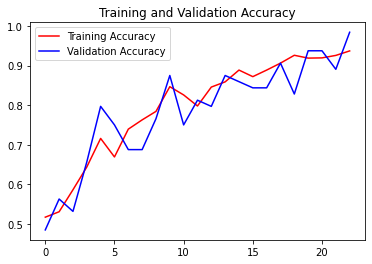

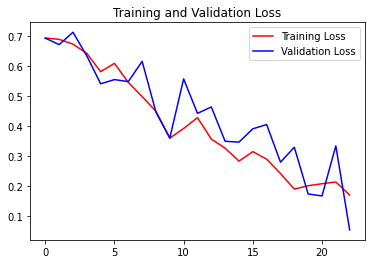

In [40]:
# Plot the accuracy and loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [41]:
# load the file names and their respective target labels into array (in this case : numpy array)
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_val, y_val, target_labels = load_dataset(val_dir)

In [42]:
# Convert images into array
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file,target_size=(300,300))))
    return images_as_array

x_val = np.array(convert_image_to_array(x_val))
print('Test set shape : ',x_val.shape)

Test set shape :  (804, 300, 300, 3)


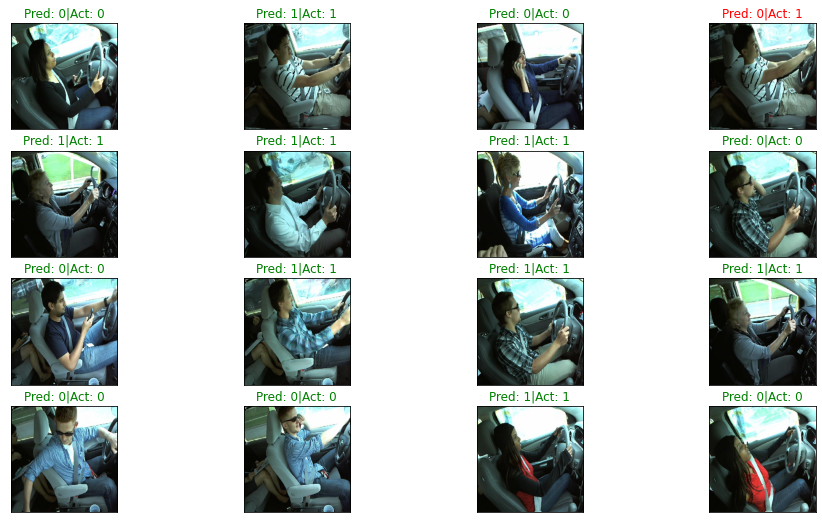

In [43]:
# Rescale images
x_val = x_val.astype('float32')/255
# Predict val y
y_val_pred = model.predict(x_val)
y_val_pred_round = np.array([1 if x > 0.5 else 0 for x in y_val_pred])

# Plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_val.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_val[idx]))
    pred_idx = y_val_pred_round[idx]
    true_idx = y_val[idx]
    ax.set_title("Pred: {}|Act: {}".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

# Evaluation

Evaluate performance of the model using confusion matrix and their classification report

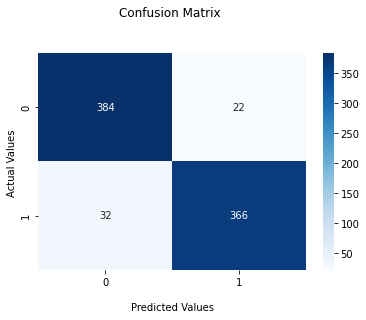

In [44]:
# confusion matrix
cf_matrix = confusion_matrix(y_val, y_val_pred_round)

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

labels = [f"{v1}" for v1 in group_counts]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [45]:
# classification report
print(classification_report(y_val, y_val_pred_round))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       406
           1       0.94      0.92      0.93       398

    accuracy                           0.93       804
   macro avg       0.93      0.93      0.93       804
weighted avg       0.93      0.93      0.93       804



# Task
Objective : predict driver's behavior in dataset "test" 

In [46]:
import glob
x_test_raw = glob.glob("/content/drive/MyDrive/DTS 2022/Exercise_W5/test"+'/*.jpg')
x_test = np.array(convert_image_to_array(x_test_raw))
print('Test set shape : ',x_test.shape)

Test set shape :  (1400, 300, 300, 3)


In [47]:
x_test = x_test.astype('float32')/255

y_pred = model.predict(x_test)
y_pred_round = [1 if x > 0.5 else 0 for x in y_pred]

img_files = [x.rpartition('/')[-1] for x in x_test_raw]

submission_df = pd.DataFrame({'file':img_files, 'label':y_pred_round})

In [48]:
submission_df

,file,label
0,img_76703.jpg,0
1,img_64307.jpg,0
2,img_20579.jpg,1
3,img_57097.jpg,0
4,img_41839.jpg,0
...,...,...
1395,img_5613.jpg,1
1396,img_73138.jpg,1
1397,img_52690.jpg,0
1398,img_59935.jpg,0


In [49]:
#Submission
submission_df.to_csv('submissions_152236035100-240.csv',index=False)